# ScalerMart 
## Data Analytics Case Study

### Solving this case study will showcase your analytical skills, problem-solving abilities, and communication expertise, making you a strong contender for any consulting position.

### Tips for Candidates:
●	Take your time to understand the business problem before diving into data analysis.
●	Document your thought process and assumptions clearly throughout your analysis.
●	Use clear and concise language in your report, avoiding technical jargon where possible.
●	Focus on actionable insights and data-driven recommendations that can be implemented to improve user engagement.

Problem Statement
### ScalerMart, a leading global electronics retailer, has experienced a significant downturn in sales, with a nearly 50% decline in revenue in 2020 compared to the previous year.

### In response to this challenge, the company is actively seeking a sharp Data Analyst to join their growing team.

### You have been assigned the task of analyzing the customer-level transactional data to identify potential reasons behind the decline in sales. 

### Your objective is to recommend data-driven strategies aimed at improving sales performance.

Data Provided:
### ●	Customers Table: Contains information about customers, including customer key, demographics (age, gender, location), and last purchase date.
### ●	Products Table: Contains information about products, including product key, category, unit price, and brand.
### ●	Sales Table: Contains information about orders placed, including order number, order date, and quantity.

# 1.	Data Exploration and Cleaning:
### ○	Describe the data cleaning steps you would take to ensure data quality before analysis. (This assesses understanding of data pre-processing)
### ○	How would you explore the distribution of customer demographics? What visualization techniques would you employ? (This assesses proficiency in data exploration and visualization)

# 2.	User Segmentation:
### ○	What customer segmentation techniques would you recommend to group users with similar characteristics? Why is segmentation crucial for this analysis? (This assesses knowledge of segmentation and its benefits)
### ○	Segment customers based on factors that might influence purchase behavior. Analyze purchase patterns within each segment. Are there any significant differences?

# 3.	Engagement Analysis:
### ○	Stakeholders have noted that a substantial portion of the company's revenue is attributed to repeat purchases from our loyal customer base. Devise a metric to quantify customer loyalty and analyze trends over time? (This assesses understanding of customer loyalty metrics)
### ○	Correlate user demographics with purchase behavior. Do you observe any patterns? Formulate and test hypotheses to identify statistically significant relationships. (This assesses ability to perform hypothesis testing and identify correlations)

# 4.	Recommendations:
### ○	Based on your analysis, what are some potential explanations for the decline in sales?
### ○	Recommend specific, data-driven strategies to improve sales across different customer segments. (This assesses problem-solving skills and ability to translate insights into actionable recommendations)

# Deliverables:
### ●	A well-structured report (slide deck) with clear explanations of your analysis process, visualizations of key findings, and a concise summary of your recommendations.
### ●	Code snippets (Python / SQL) used for data exploration and analysis (demonstrates technical skills).





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Loading Customers data in jupyter notebook

In [2]:
Customers = pd.read_csv('Customers.csv',encoding= 'unicode_escape')

In [3]:
Customers

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


# Converting Birthday column in it to datetime format to be able to calculate age

In [4]:
Customers['Birthday']=pd.to_datetime(Customers['Birthday']) # converting birthday column to datetime format

In [5]:
Customers['Age'] = 2020-Customers['Birthday'].dt.year

In [6]:
Customers['Age']

0        81
1        41
2        73
3        63
4        55
         ..
15261    84
15262    28
15263    83
15264    83
15265    55
Name: Age, Length: 15266, dtype: int32

In [7]:
Customers.dtypes

CustomerKey             int64
Gender                 object
Name                   object
City                   object
State Code             object
State                  object
Zip Code               object
Country                object
Continent              object
Birthday       datetime64[ns]
Age                     int32
dtype: object

# Loading Sales data in jupyter notebook

In [8]:
Sales = pd.read_csv('Sales.csv')

In [9]:
Sales['Order Date'] = pd.to_datetime(Sales['Order Date'])
Sales['Delivery Date'] = pd.to_datetime(Sales['Delivery Date'])

In [10]:
Sales.dtypes

Order Number              int64
Line Item                 int64
Order Date       datetime64[ns]
Delivery Date    datetime64[ns]
CustomerKey               int64
StoreKey                  int64
ProductKey                int64
Quantity                  int64
Currency Code            object
dtype: object

# Loading Customers data in jupyter notebook

In [11]:
Products = pd.read_csv('Products.csv')

In [12]:
Products.dtypes

ProductKey         int64
Product Name      object
Brand             object
Color             object
Unit Cost USD     object
Unit Price USD    object
SubcategoryKey     int64
Subcategory       object
CategoryKey        int64
Category          object
dtype: object

# Converting string data into integer which is necessary to be able to calculate Total Sales  

In [13]:
Products['Unit Cost USD'] = Products['Unit Cost USD'].str[1:] # Slicing the columns to remove the '$' symbol for calculation

In [14]:
Products['Unit Cost USD'] =Products['Unit Cost USD'].str.replace(',','')
Products['Unit Cost USD'] =Products['Unit Cost USD'].str.replace(' ','')

In [15]:
Products['Unit Price USD'] = Products['Unit Price USD'].str[1:]  # Slicing the columns to remove the '$' symbol for calculation

In [16]:
Products['Unit Price USD'] =Products['Unit Price USD'].str.replace(',','')
Products['Unit Price USD'] =Products['Unit Price USD'].str.replace(' ','')

In [17]:
Products['Unit Price USD'] = Products['Unit Price USD'].astype('float')
Products['Unit Cost USD'] = Products['Unit Cost USD'].astype('float')

In [18]:
Products['Sales'] = Products['Unit Price USD'] * Products['Unit Cost USD']

In [19]:
Products.isna().sum() # there is no null values in the products data

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
Sales             0
dtype: int64

# There are 49,719 null values in the delivery date column 

In [20]:
Sales.isna().sum()  

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [21]:
diff = Sales['Delivery Date'] - Sales['Order Date']

In [22]:
diff.value_counts().sort_values(ascending=True)

17 days       5
14 days       7
15 days       8
13 days      17
12 days      45
11 days      81
10 days     173
9 days      280
8 days      519
1 days      549
7 days      967
2 days     1480
6 days     1592
5 days     2189
3 days     2518
4 days     2735
Name: count, dtype: int64

In [23]:
Sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD


In [24]:
Customers.isna().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
Age             0
dtype: int64

In [25]:
# To Determine which join to choose :-
# we will consider the problem statement which states that we want to 


In [26]:
Join_data = pd.merge(Sales,Products, on = 'ProductKey',how = 'left')

In [27]:
Join_data = pd.merge(Join_data, Customers, on ='CustomerKey', how = 'left')

In [28]:
Join_data.isna().sum()

Order Number          0
Line Item             0
Order Date            0
Delivery Date     49719
CustomerKey           0
StoreKey              0
ProductKey            0
Quantity              0
Currency Code         0
Product Name          0
Brand                 0
Color                 0
Unit Cost USD         0
Unit Price USD        0
SubcategoryKey        0
Subcategory           0
CategoryKey           0
Category              0
Sales                 0
Gender                0
Name                  0
City                  0
State Code           30
State                 0
Zip Code              0
Country               0
Continent             0
Birthday              0
Age                   0
dtype: int64

In [29]:
Join_data[Join_data['Delivery Date'].isna()][['Delivery Date','Sales']]

,Delivery Date,Sales
0,NaT,2126.3600
6,NaT,839933.2660
7,NaT,29903.8500
8,NaT,101153.9200
9,NaT,1546.5933
...,...,...
62867,NaT,130252.9800
62868,NaT,8.4042
62869,NaT,12406.6800
62872,NaT,50.8491


# Imputation Treatment of the null values in the sales data :-
* # It has been observed that for every records where there is null values in the delivery date we are having StoreKey which is non-zero
* # Also there is a actual sale for the related sales records in the Sales data hence 
## It can be assumed that the such sales are directly deliverd / purchased from Store 
## hence we can impute such delivery date by the order date of such records and so on.

In [30]:
Join_data['Delivery Date'].fillna(Join_data['Order Date'],inplace=True)

In [31]:
Join_data

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,...,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age
0,366000,1,2016-01-01,2016-01-01,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,...,Male,Tyler Vaught,London,ON,Ontario,N5W 5K6,Canada,North America,1971-03-23,49
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,A. Datum SLR Camera X136 Silver,...,Male,Frank Upchurch,Auberry,CA,California,93602,United States,North America,1995-11-20,25
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Fabrikam Microwave 1.5CuFt X1100 Black,...,Male,Frank Upchurch,Auberry,CA,California,93602,United States,North America,1995-11-20,25
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Contoso SLR Camera M146 Orange,...,Female,Joan Roche,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,1962-08-24,58
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Adventure Works Laptop8.9 E0890 White,...,Female,Joan Roche,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,1962-08-24,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,2021-02-20,1216913,43,632,3,USD,WWI Screen 85in E1010 White,...,Male,Donald Woodie,Garden Grove,CA,California,92643,United States,North America,1939-04-16,81
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,EUR,WWI Wireless Bluetooth Stereo Headphones M170 ...,...,Female,Gabriele Thalberg,Stuttgart Frauenkopf,BW,Baden-Württemberg,70184,Germany,Europe,1940-03-10,80
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,CAD,SV DVD 7-Inch Player Portable E200 White,...,Male,William Rochelle,Calgary,AB,Alberta,T2T 0C6,Canada,North America,1993-05-25,27
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,CAD,MGS Flight Simulator X M250,...,Male,William Rochelle,Calgary,AB,Alberta,T2T 0C6,Canada,North America,1993-05-25,27


In [32]:
Join_data[Join_data['Delivery Date'] == Join_data['Order Date']].shape 

(49719, 29)

### Delivery Date Imputation Done Sucessfully

In [33]:
Join_data[Join_data["State Code"].isna()][['State']].value_counts()

State 
Napoli    30
Name: count, dtype: int64

In [34]:
Join_data[Join_data["State Code"].isna()][['State']].value_counts().sum()

30

In [35]:
Join_data[Join_data["State"]== 'Napoli']['State'].count()

30

# Imputation Technique for 30 records of State code

# It has been Observed that State Code for all the records with state 'Napoli' has been stated as null and 
# we will replace NAP with shortform for Napoli

In [36]:
Join_data['State Code'].fillna('NAP',inplace = True)

In [37]:
Join_data[Join_data["State Code"].isna()][['State Code']].value_counts().sum()

0

In [38]:
Join_data[Join_data['State Code']=='NAP'].value_counts().sum() 

30

### State Code Imputation Done Sucessfully

In [39]:
Join_data.isna().sum().sum()

0

## There is no null value in entire dataframe 

# Now starting with EDA

As the problem statement clearly specified that there was a significant downturn in sales, with a nearly 50% decline in revenue in 2020 compared to the previous year. ie 2019 
So we will filter the data based on year 2019 and 2020 only

In [40]:
Join_data = Join_data[(Join_data['Order Date'].dt.year == 2019) | (Join_data['Order Date'].dt.year == 2020)]

In [41]:
sales_2019 =Join_data[Join_data['Order Date'].dt.year==2019]['Sales'].sum()
sales_2019

1669925150.2814

### Sales for the year 2019 was 1669925150.2814


In [42]:
sales_2020=Join_data[Join_data['Order Date'].dt.year==2020]['Sales'].sum()
sales_2020

834943994.6052

### Sales for the year 2020 was 834943994.6052

* ###  Hence we came to know there was a actual decline in sales in 2020 as compared to 2019.

In [43]:
Join_data['Order Year'] = Join_data['Order Date'].dt.year


In [44]:
Join_data['Order Year'].value_counts()

Order Year
2019    21611
2020    11026
Name: count, dtype: int64

* ### It has been Observed that the Order Quantity for the year 2020 is decline to 50 % as compared to 2019

Aggregating data for better visualization 

In [45]:
Group_data = Join_data.groupby('Order Year')[['Sales']].sum()

## Graphical representation of the Total sales for the two years

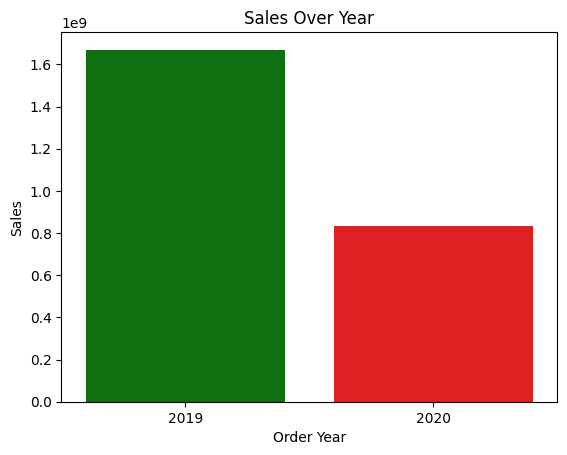

In [46]:
plt.xlabel = ('Year')
plt.ylabel = ('Sales')
plt.title('Sales Over Year')
palette = {'2019':'green','2020':'red'}
sns.barplot(Group_data,x='Order Year',palette = palette, y = 'Sales')
plt.show()


In [47]:
Join_data['Age']=Join_data['Age'].astype('str')

## Graph To identify whether Customer Sales are evenly distributed throughout different 'Age' of Customers

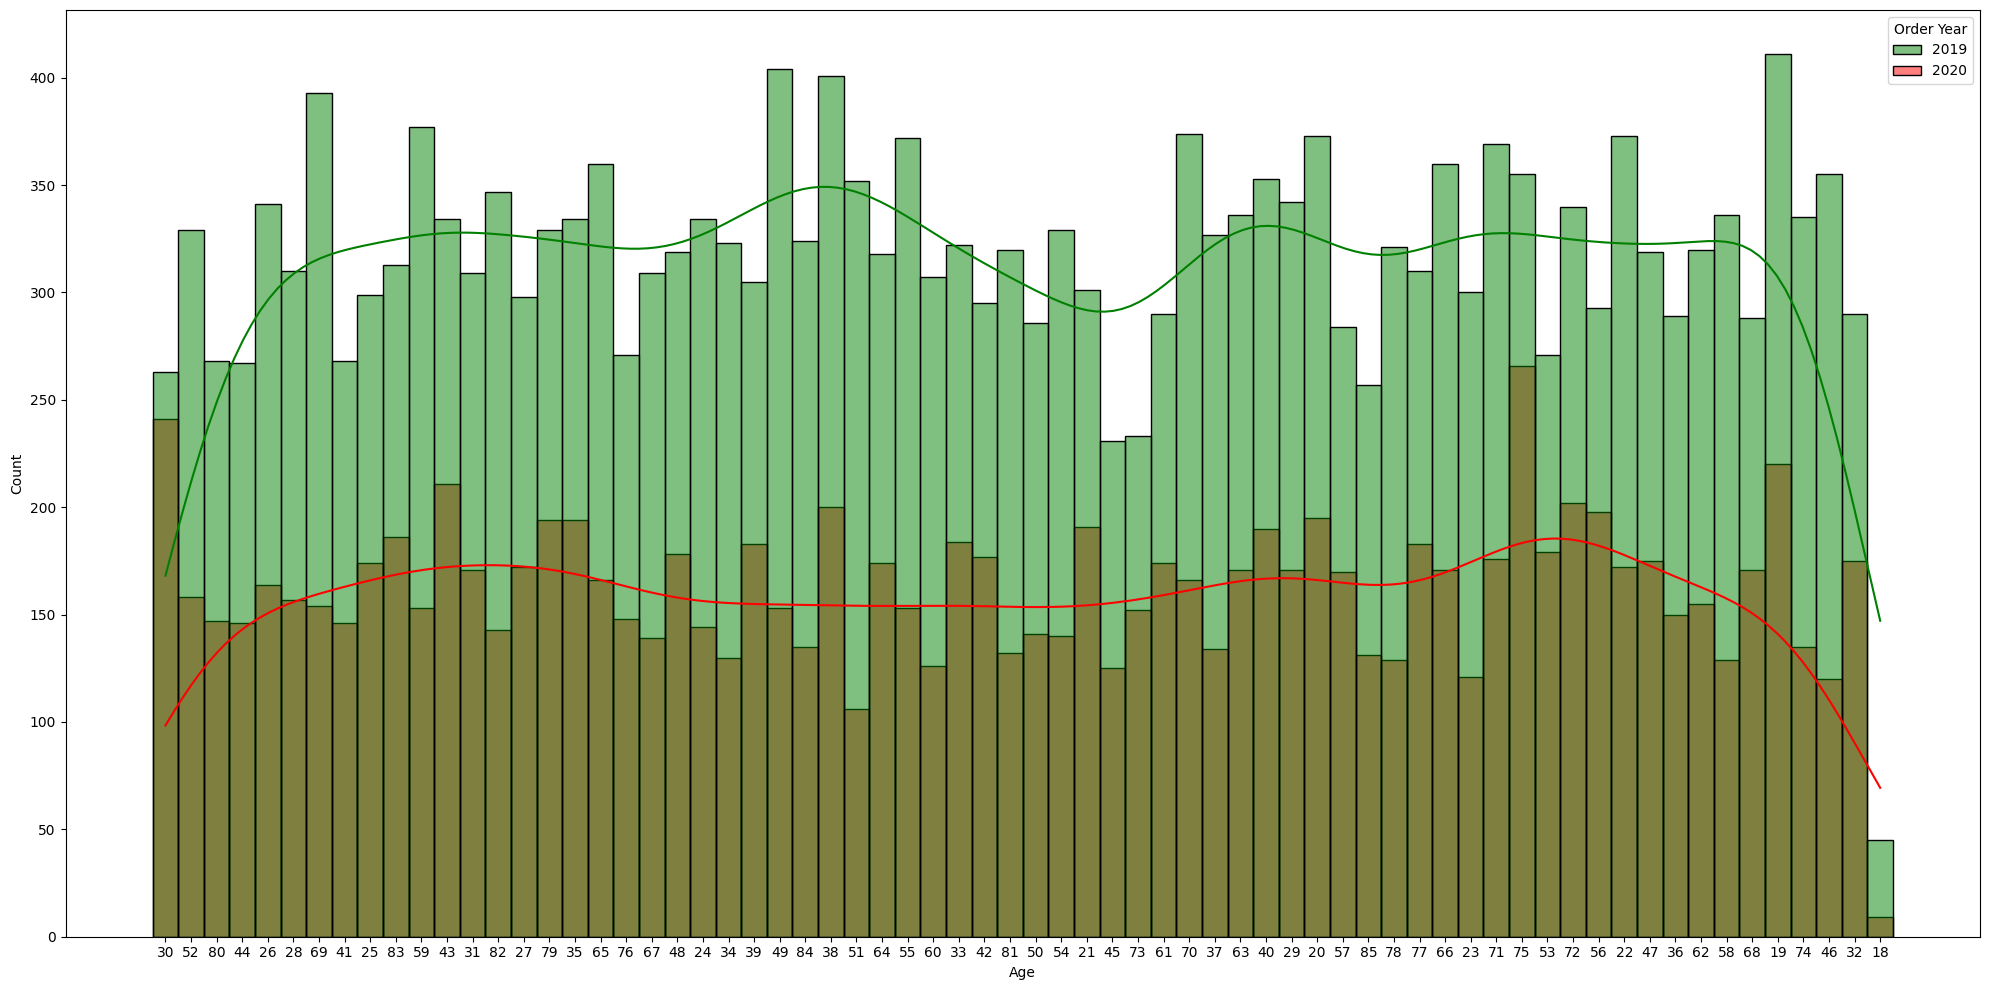

In [48]:
plt.figure(figsize=(20,10))
palette={2019:'green',2020:'red'}
sns.histplot(data=Join_data, x='Age', bins=30, kde=True,hue='Order Year',palette=palette)
plt.tight_layout()

plt.show()

### To identify whether Customer Sales are evenly distributed throughout the 'Gender' of Customers

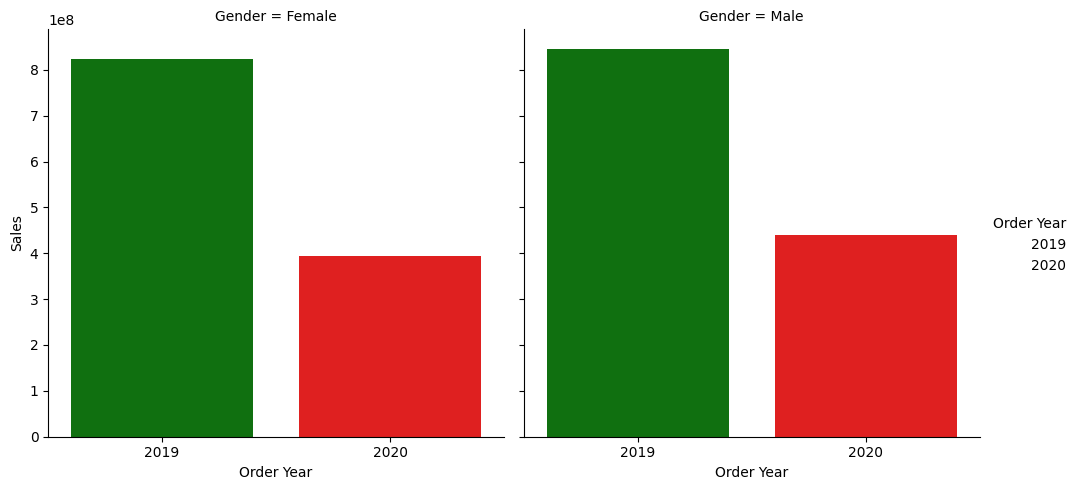

In [49]:
group_gender = Join_data.groupby(['Gender','Order Year'])[['Sales']].sum()
palette={'2019':'green','2020':'red'}
sns.catplot(data=group_gender, y= 'Sales',x='Order Year',col='Gender',kind='bar',palette=palette)
plt.show()

### Products Performance Analysis

In [50]:
Join_data.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'Product Name', 'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD',
       'SubcategoryKey', 'Subcategory', 'CategoryKey', 'Category', 'Sales',
       'Gender', 'Name', 'City', 'State Code', 'State', 'Zip Code', 'Country',
       'Continent', 'Birthday', 'Age', 'Order Year'],
      dtype='object')

## Below graph to identify the distribution of sales(amount)for each productKey

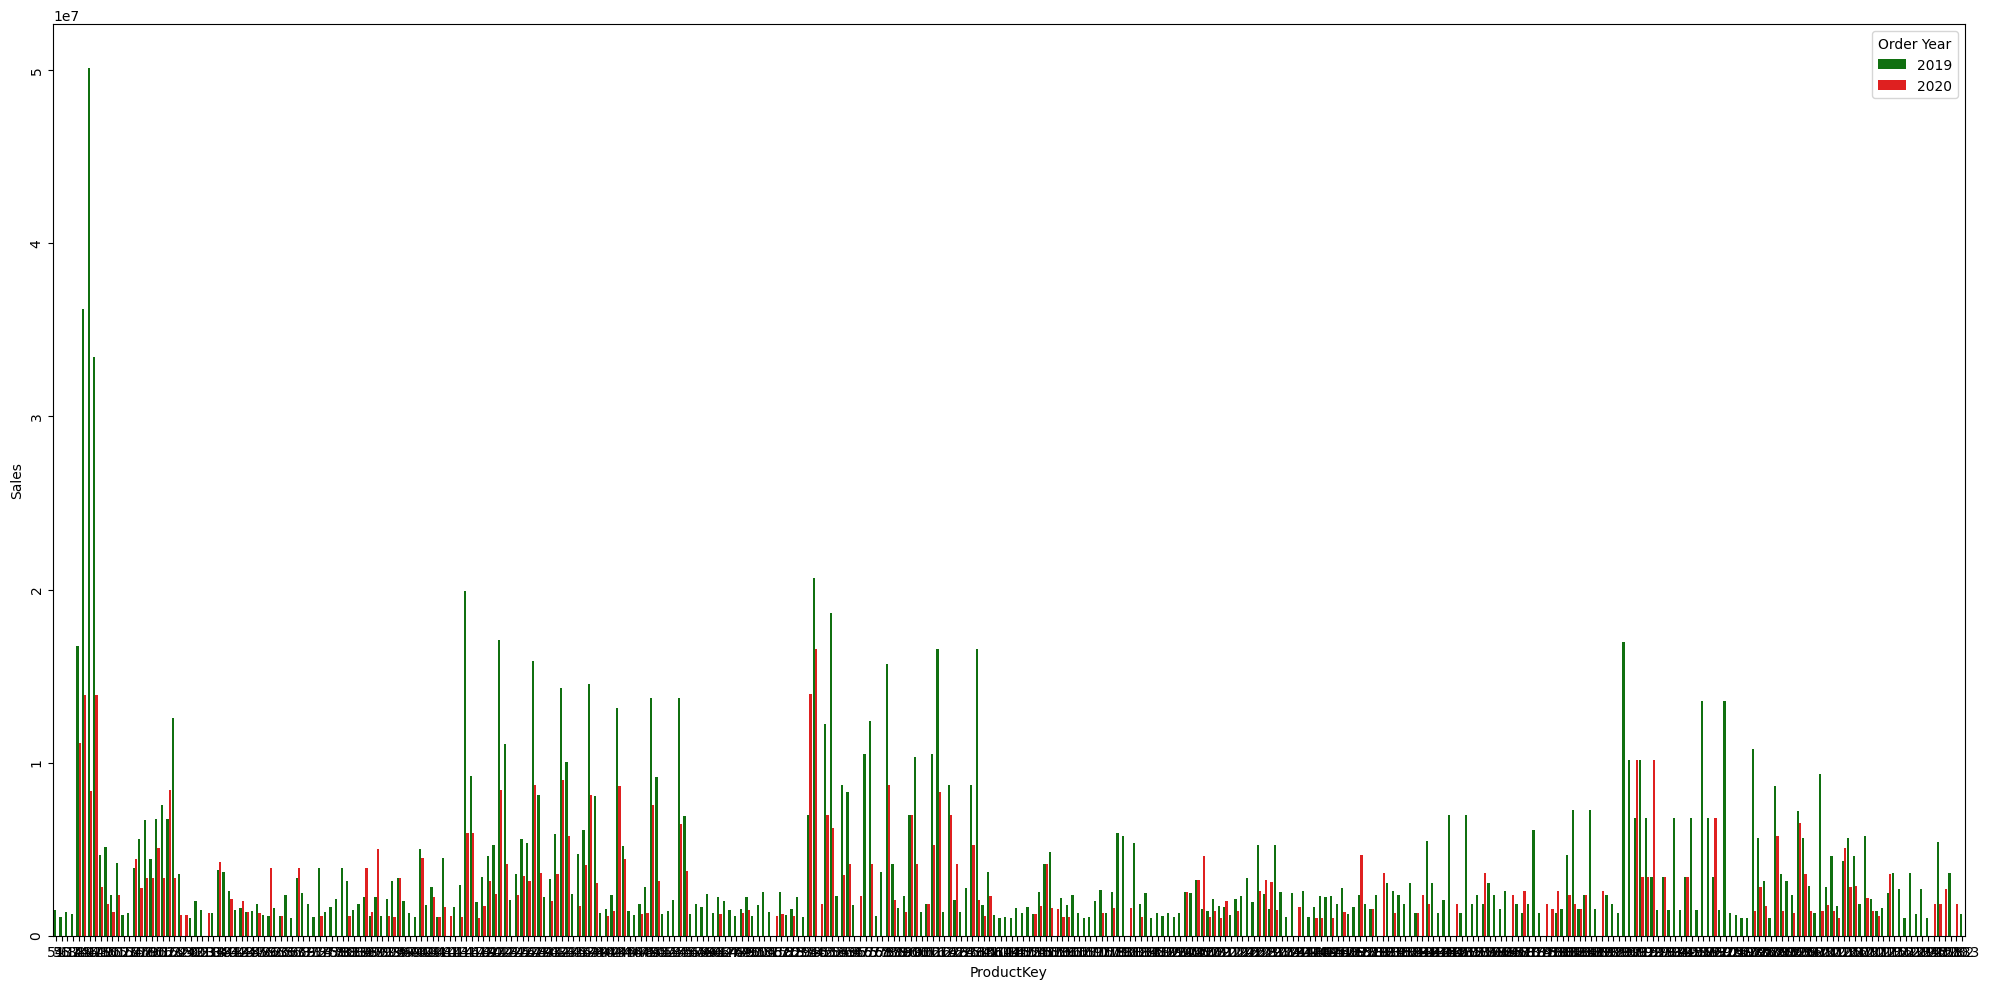

In [51]:
ProductKey_data = Join_data.groupby(['ProductKey','Order Year'])[['Sales']].sum().sort_values(ascending=False,by ='Sales').iloc[:500,]

plt.figure(figsize=(20,10))
palette = {2019: 'green', 2020: 'red'}

sns.barplot(data = ProductKey_data, x='ProductKey',y = 'Sales',hue='Order Year',palette=palette,width = 0.8)
palette = {2019: 'green', 2020: 'red'}

plt.yticks(rotation=90)
plt.tight_layout()

plt.show()

## Below graph to identify the distribution of Sales (Quantity) for each productKey


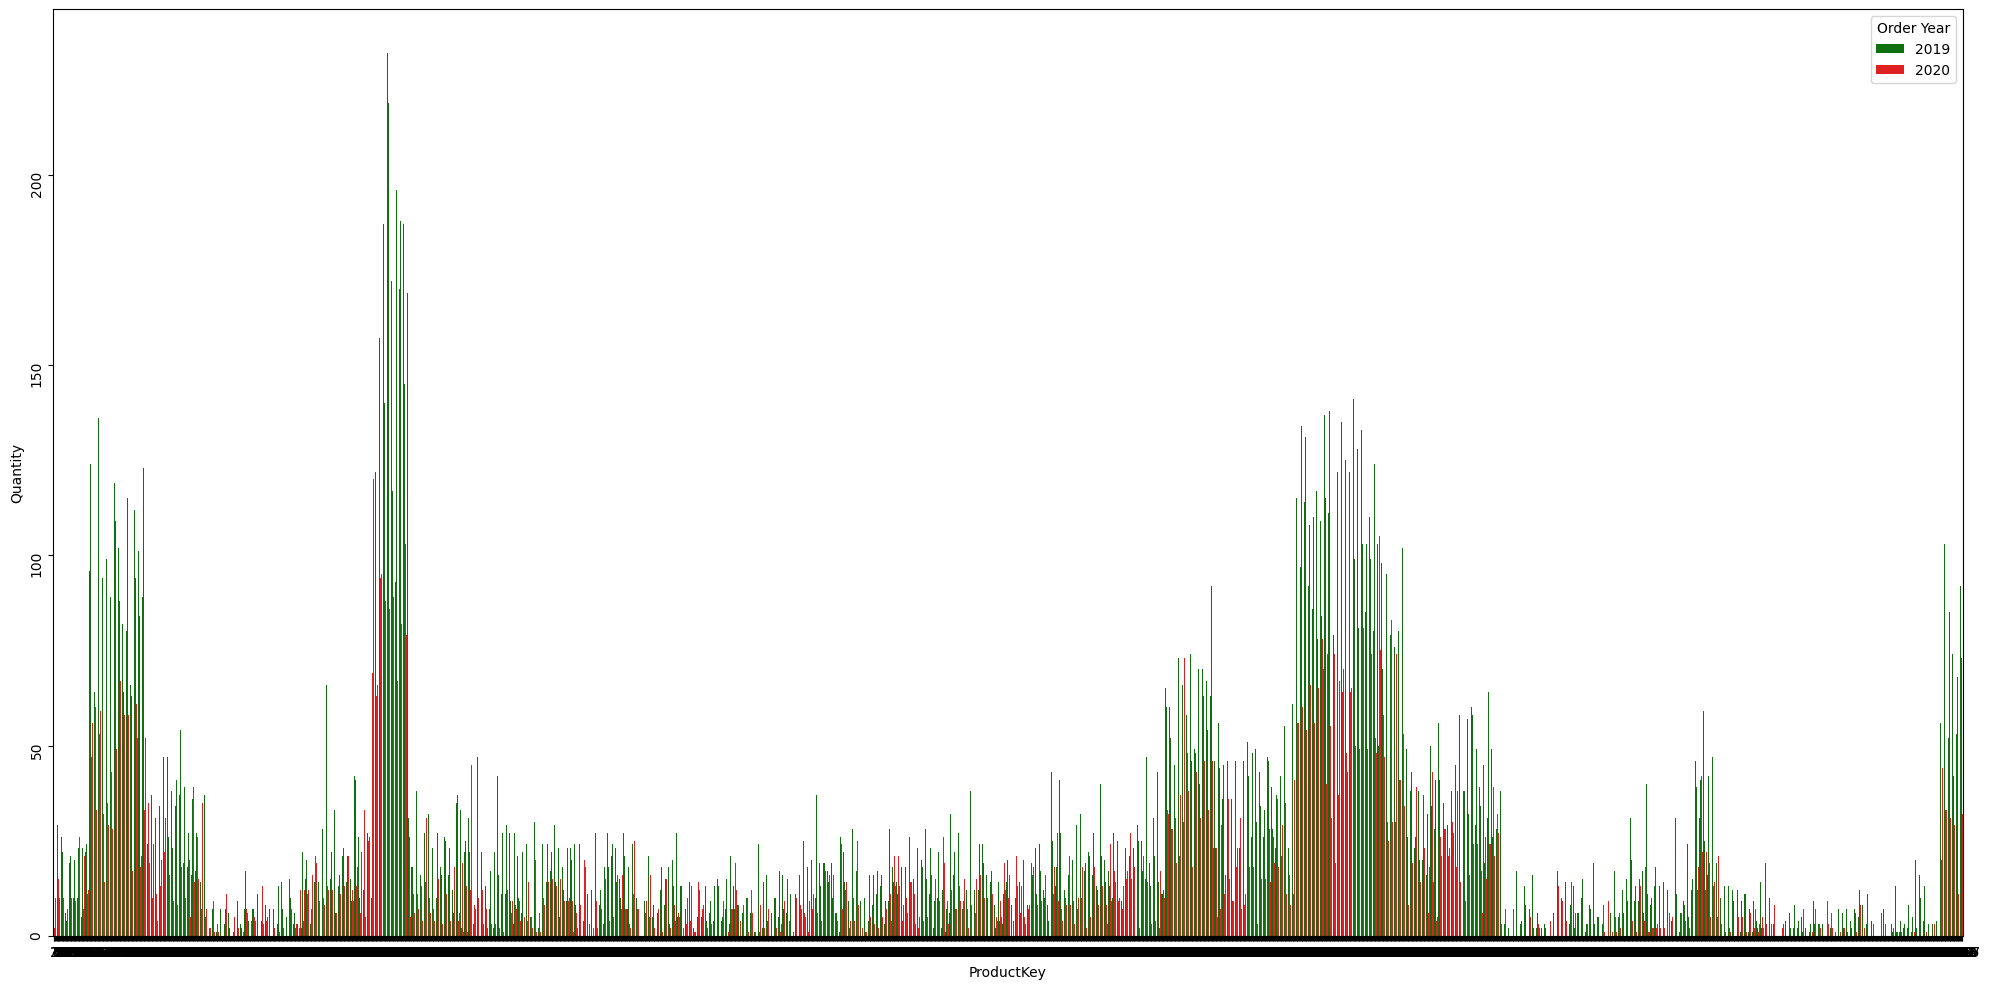

In [52]:
Quantity_data = Join_data.groupby(['ProductKey','Order Year'])[['Quantity']].sum().sort_values(ascending=False,by=['Quantity'])

plt.figure(figsize=(20,10))
palette = {2019: 'green', 2020: 'red'}

sns.barplot(data = Quantity_data, x='ProductKey',y = 'Quantity',hue='Order Year',palette=palette,width = 0.8)
palette = {2019: 'green', 2020: 'red'}

plt.yticks(rotation=90)
plt.tight_layout()

plt.show()

## Below graph to identify the distribution of Sales (amount) for each Line Item.


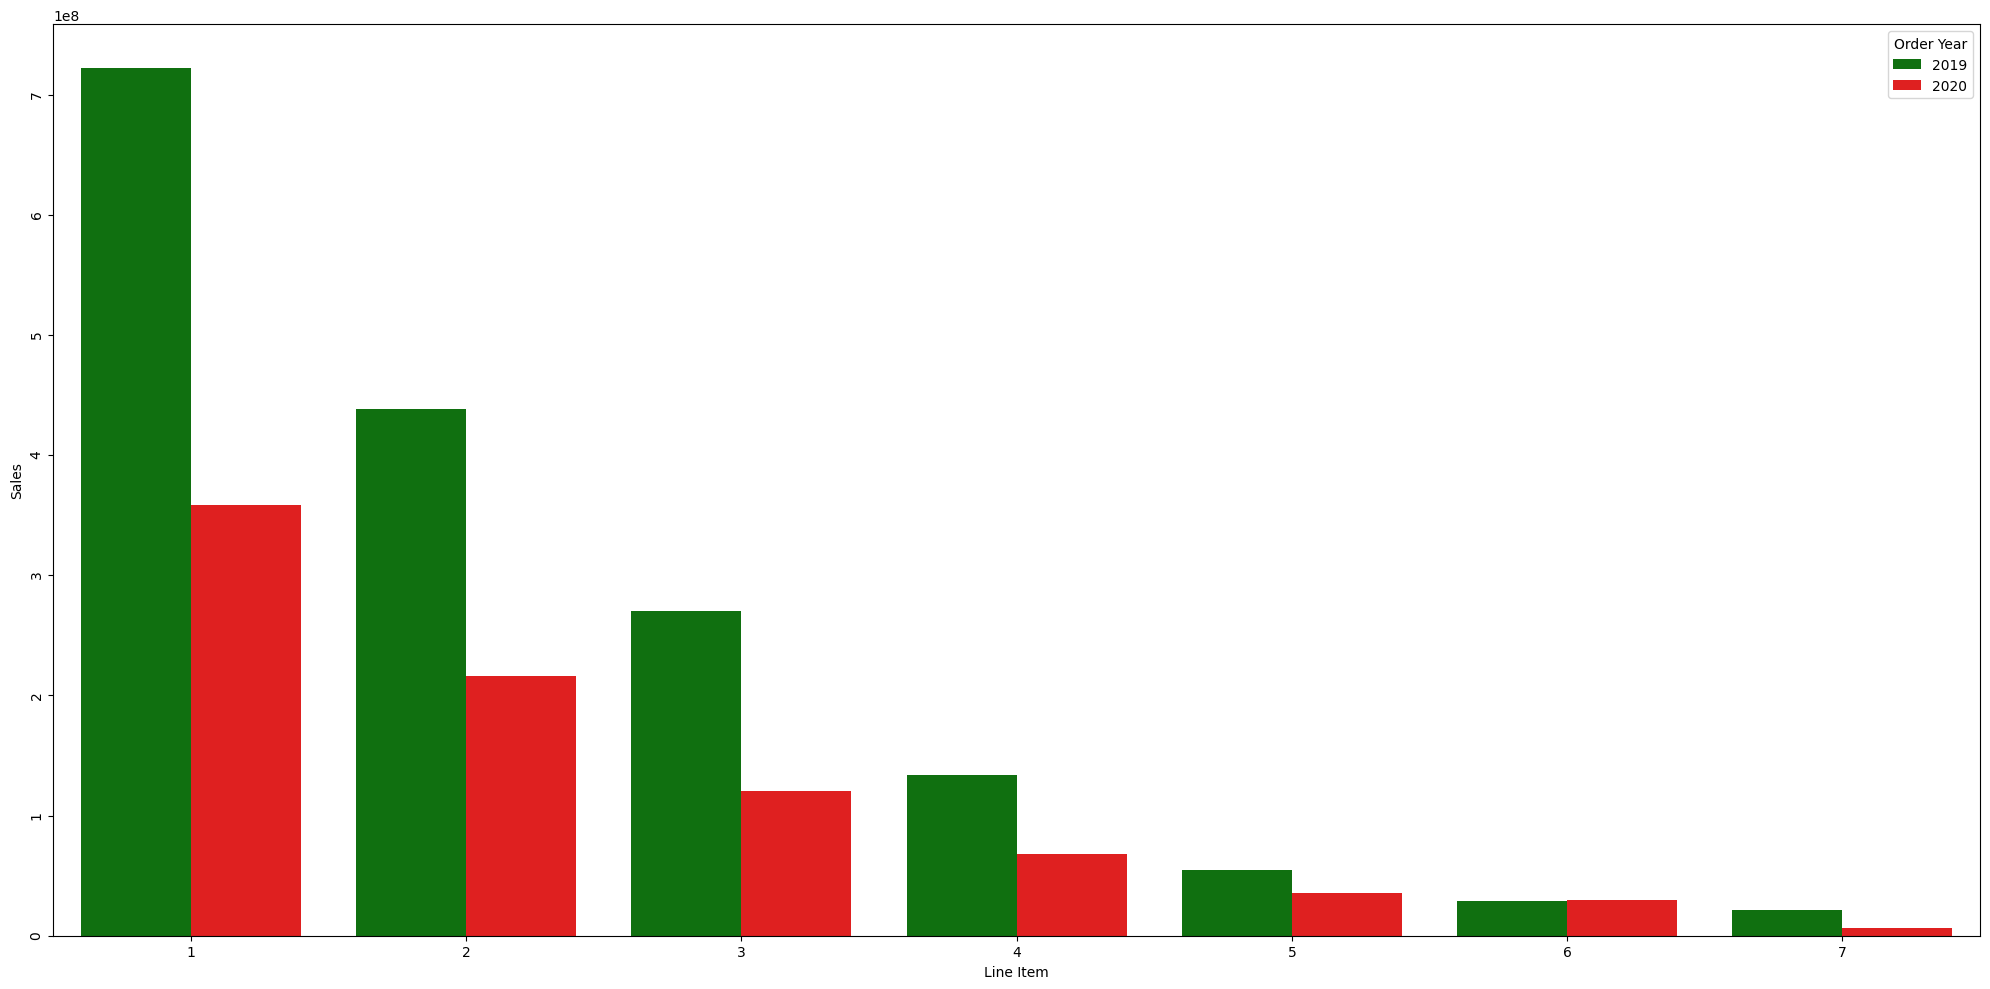

In [53]:
Line_item_data = Join_data.groupby(['Line Item','Order Year'])[['Sales']].sum().sort_values(ascending=False,by ='Sales').iloc[:500,]

plt.figure(figsize=(20,10))
palette = {2019: 'green', 2020: 'red'}

sns.barplot(data = Line_item_data, x='Line Item',y = 'Sales',hue='Order Year',palette=palette,width = 0.8)
palette = {2019: 'green', 2020: 'red'}

plt.yticks(rotation=90)
plt.tight_layout()

plt.show()

In [54]:
Join_data.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'Product Name', 'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD',
       'SubcategoryKey', 'Subcategory', 'CategoryKey', 'Category', 'Sales',
       'Gender', 'Name', 'City', 'State Code', 'State', 'Zip Code', 'Country',
       'Continent', 'Birthday', 'Age', 'Order Year'],
      dtype='object')

## Below graph to identify the distribution of Sales (amount) for each StoreKey.


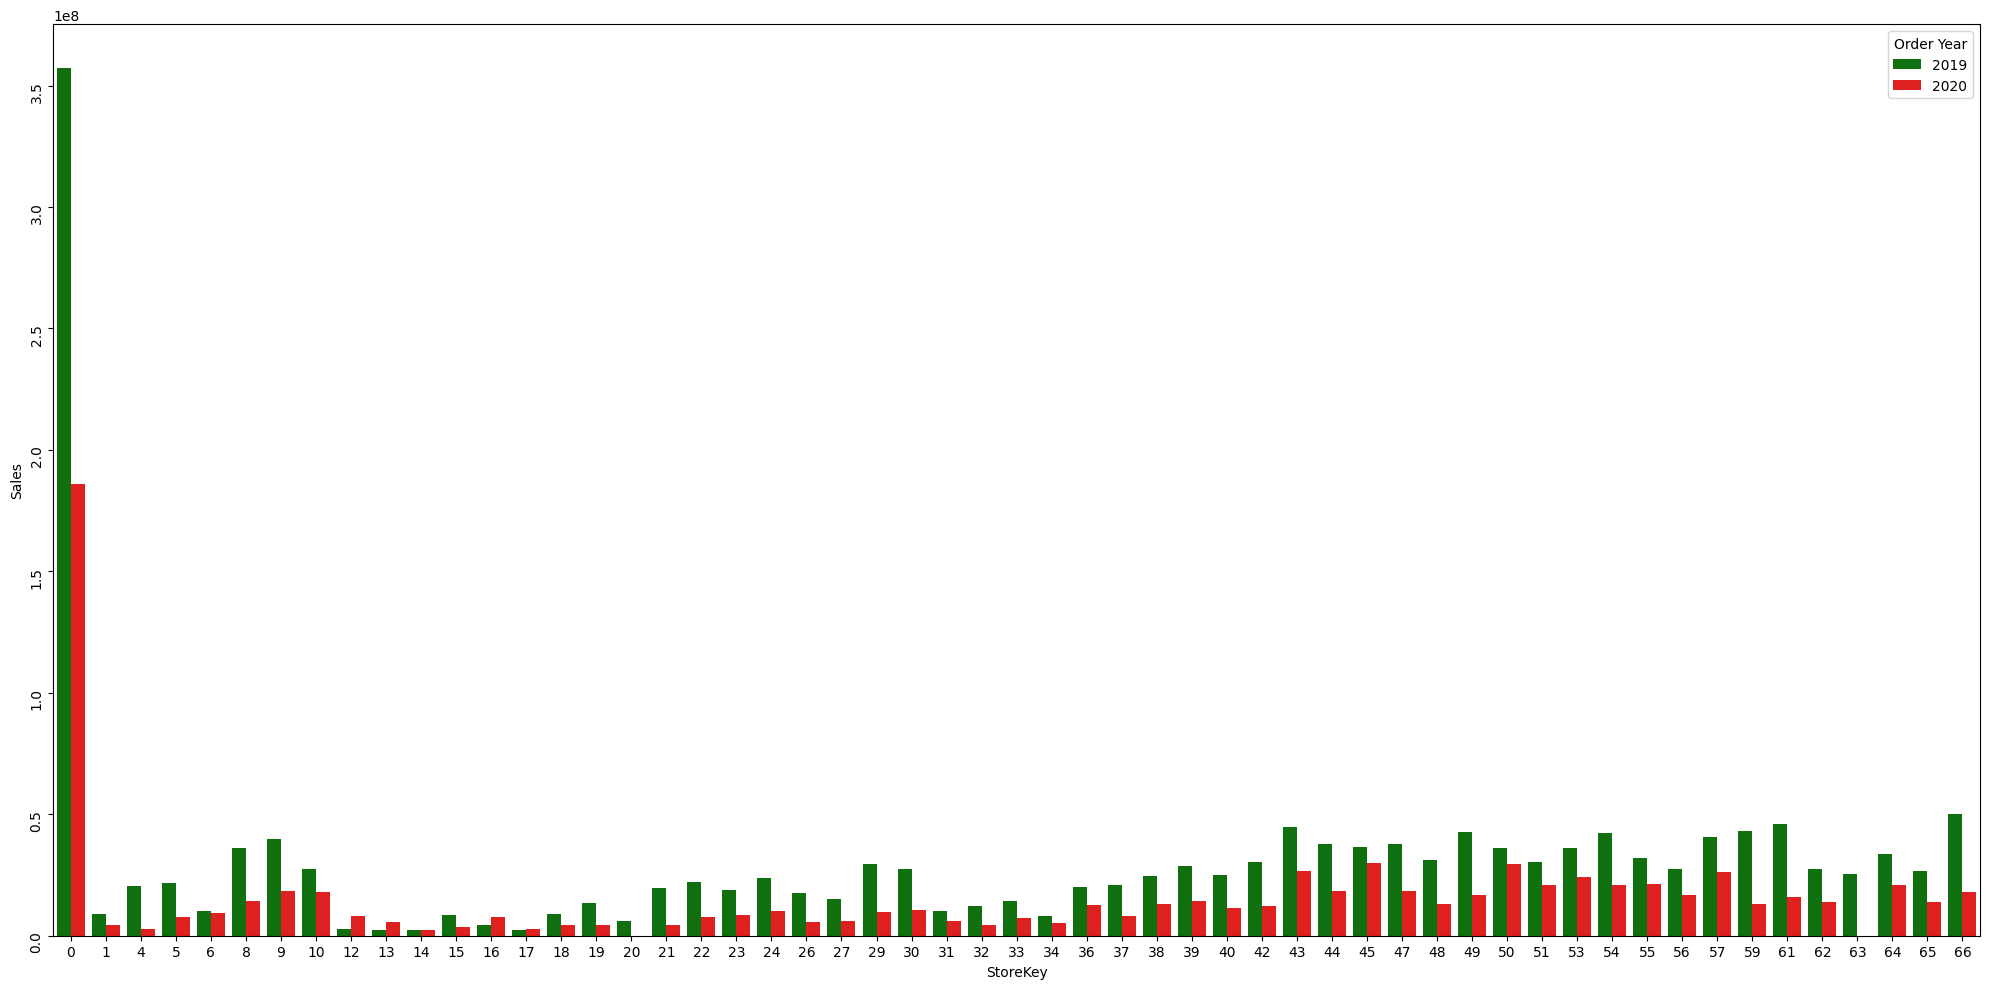

In [55]:
StoreKey_data = Join_data.groupby(['StoreKey','Order Year'])[['Sales']].sum().sort_values(ascending=False,by ='Sales')

plt.figure(figsize=(20,10))

palette = {2019: 'green', 2020: 'red'}

sns.barplot(data = StoreKey_data, x='StoreKey',y = 'Sales',hue='Order Year',palette=palette,width = 0.8)
palette = {2019: 'green', 2020: 'red'}

plt.yticks(rotation=90)
plt.tight_layout()

plt.show()

In [56]:
Join_data.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'Product Name', 'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD',
       'SubcategoryKey', 'Subcategory', 'CategoryKey', 'Category', 'Sales',
       'Gender', 'Name', 'City', 'State Code', 'State', 'Zip Code', 'Country',
       'Continent', 'Birthday', 'Age', 'Order Year'],
      dtype='object')

## Below graph to show distribution of Sales(amount) for each Category

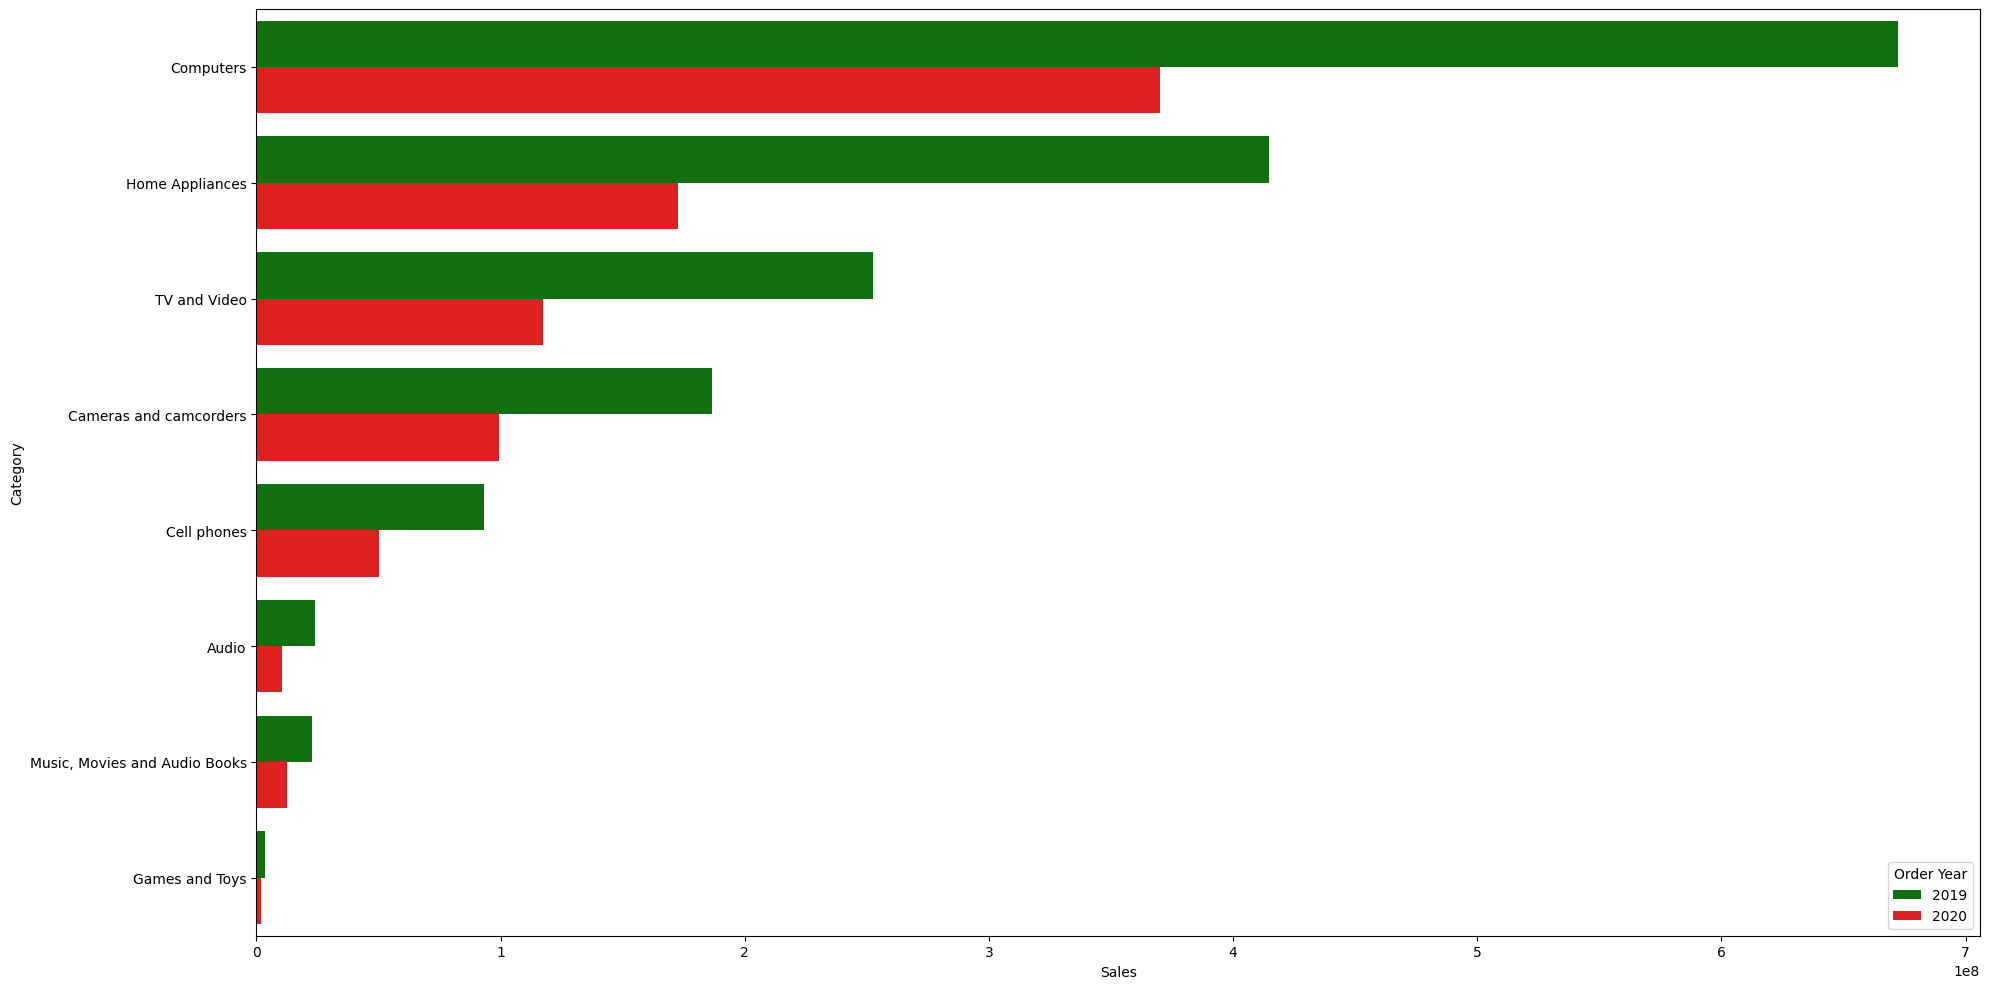

In [57]:
Category_sub_data = Join_data.groupby(['Category','Order Year'])[['Sales']].sum().sort_values(ascending=False,by ='Sales')
plt.figure(figsize=(20,10))
palette = {2019: 'green', 2020: 'red'}
sns.barplot(data=Category_sub_data, y='Category', x='Sales', hue= 'Order Year',palette=palette)

plt.tight_layout()
plt.show()

## Below graph to show distribution of Sales(amount) for each Subcategory

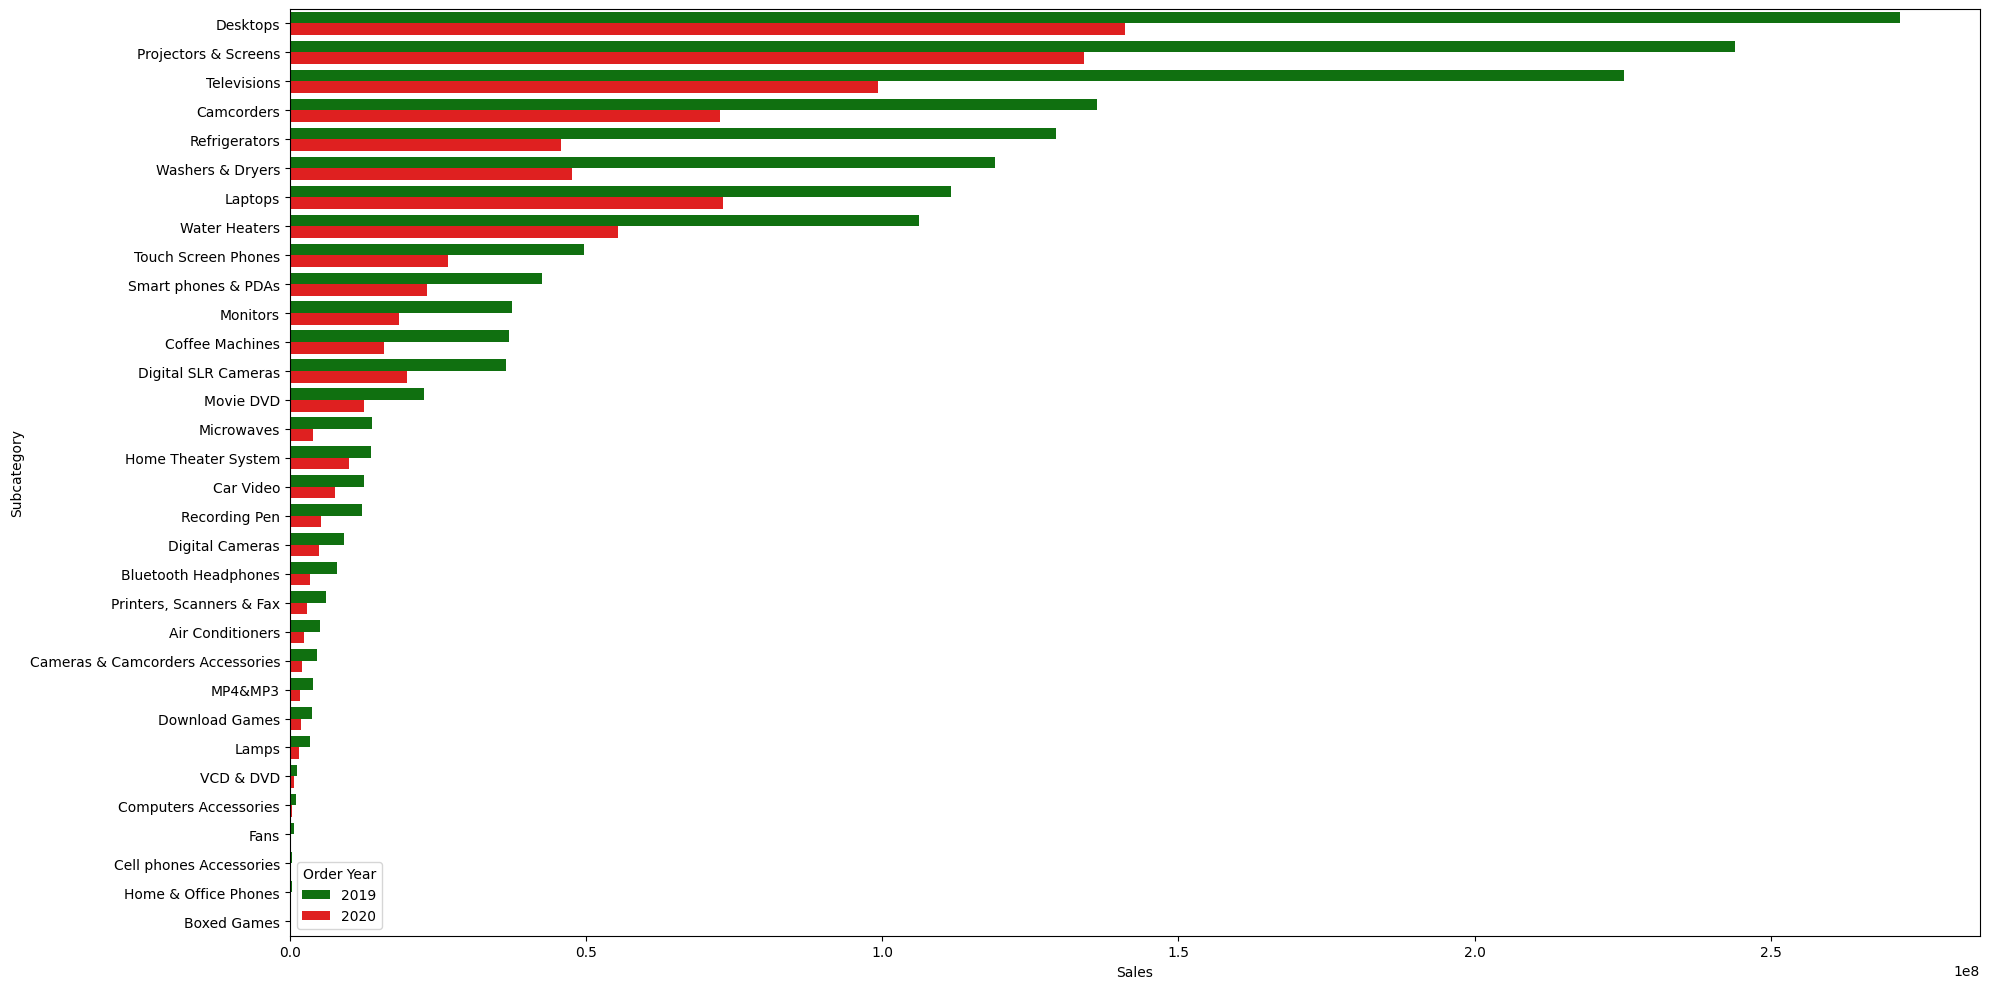

In [58]:
Category_sub_data = Join_data.groupby(['Subcategory','Order Year'])[['Sales']].sum().sort_values(ascending=False,by ='Sales')
plt.figure(figsize=(20, 10))
palette = {2019: 'green', 2020: 'red'}
sns.barplot(data=Category_sub_data, y='Subcategory', x='Sales', hue= 'Order Year',palette=palette)

plt.tight_layout()
plt.show()

In [59]:
Join_data.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'Product Name', 'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD',
       'SubcategoryKey', 'Subcategory', 'CategoryKey', 'Category', 'Sales',
       'Gender', 'Name', 'City', 'State Code', 'State', 'Zip Code', 'Country',
       'Continent', 'Birthday', 'Age', 'Order Year'],
      dtype='object')

In [60]:
Join_data['Country'].value_counts()

Country
United States     18228
United Kingdom     3688
Germany            3212
Canada             2699
Australia          1494
Italy              1223
Netherlands        1177
France              916
Name: count, dtype: int64

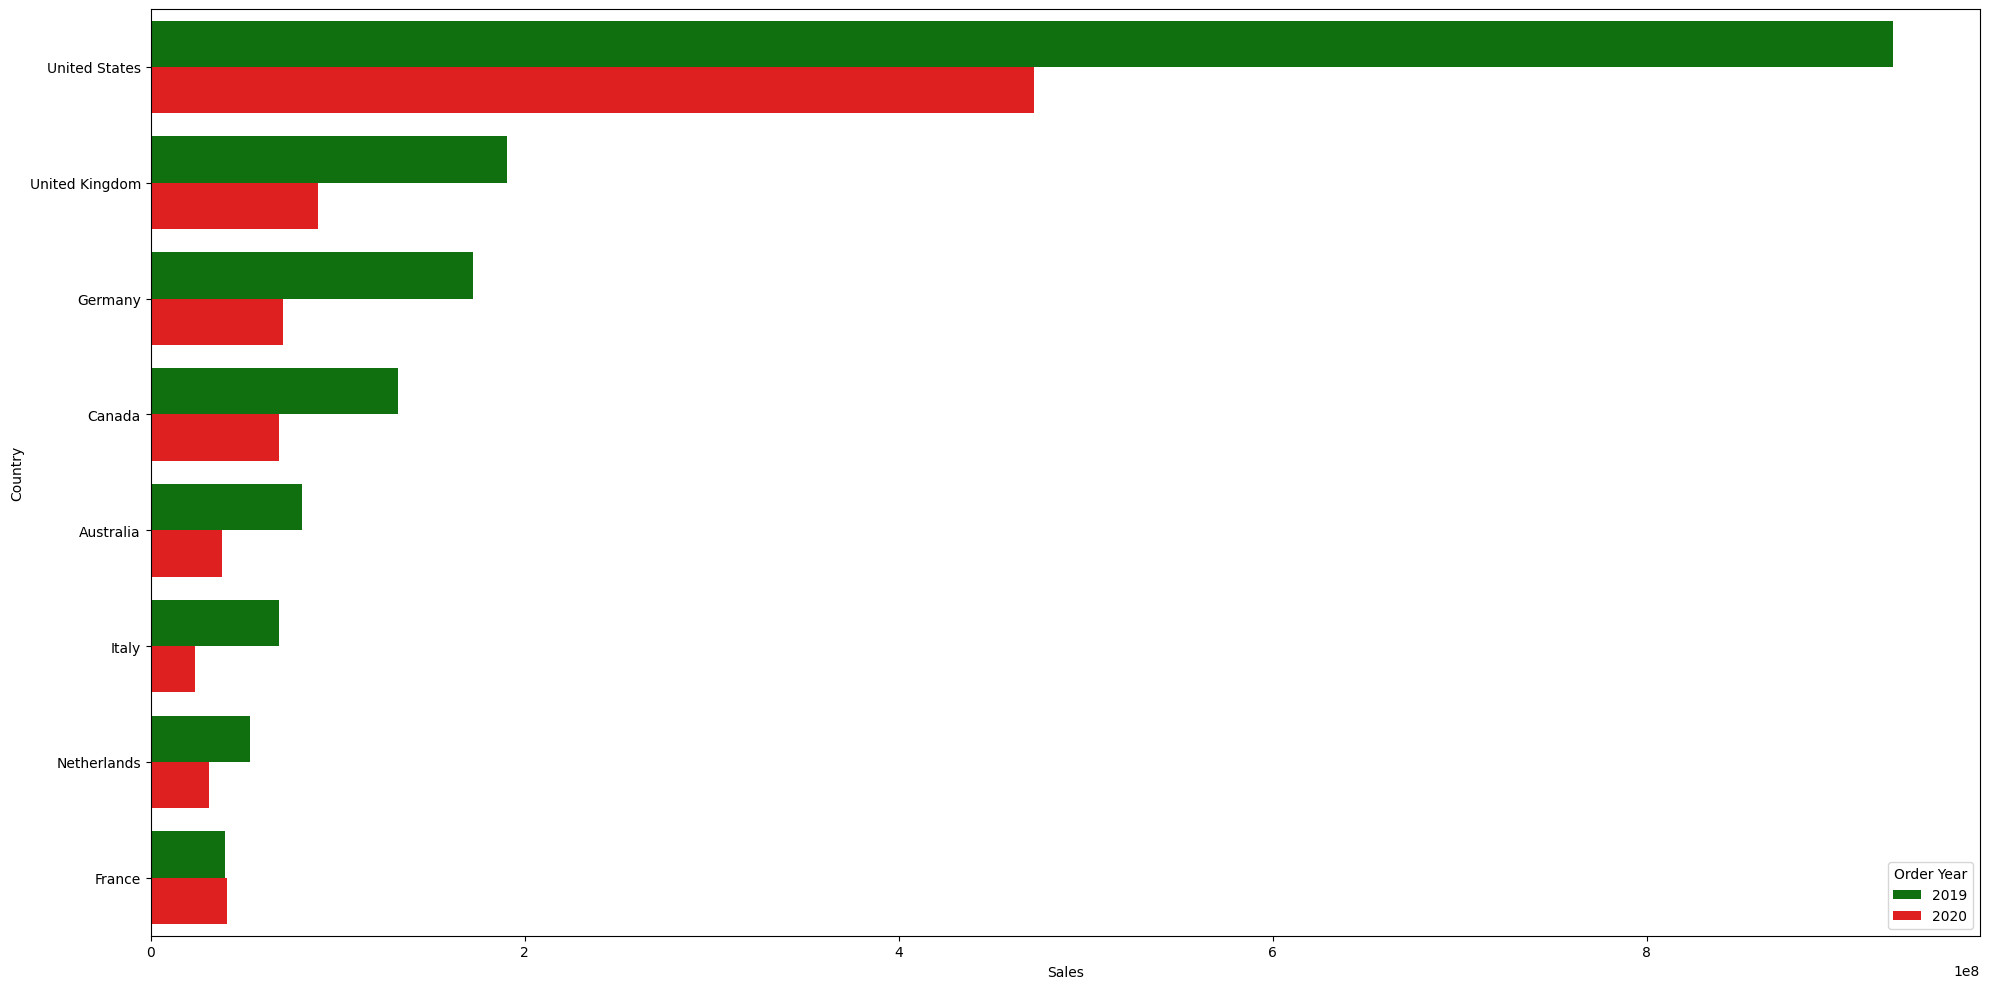

In [61]:
Country_data = Join_data.groupby(['Order Year','Country'])[['Sales']].sum().sort_values(ascending=False,by ='Sales').iloc[:50,]

palette= {2019:'green',2020:'red'}
plt.figure(figsize=(20,10))
sns.barplot(data=Country_data, x='Sales',y='Country',hue='Order Year',palette = palette)
plt.tight_layout()
plt.show()


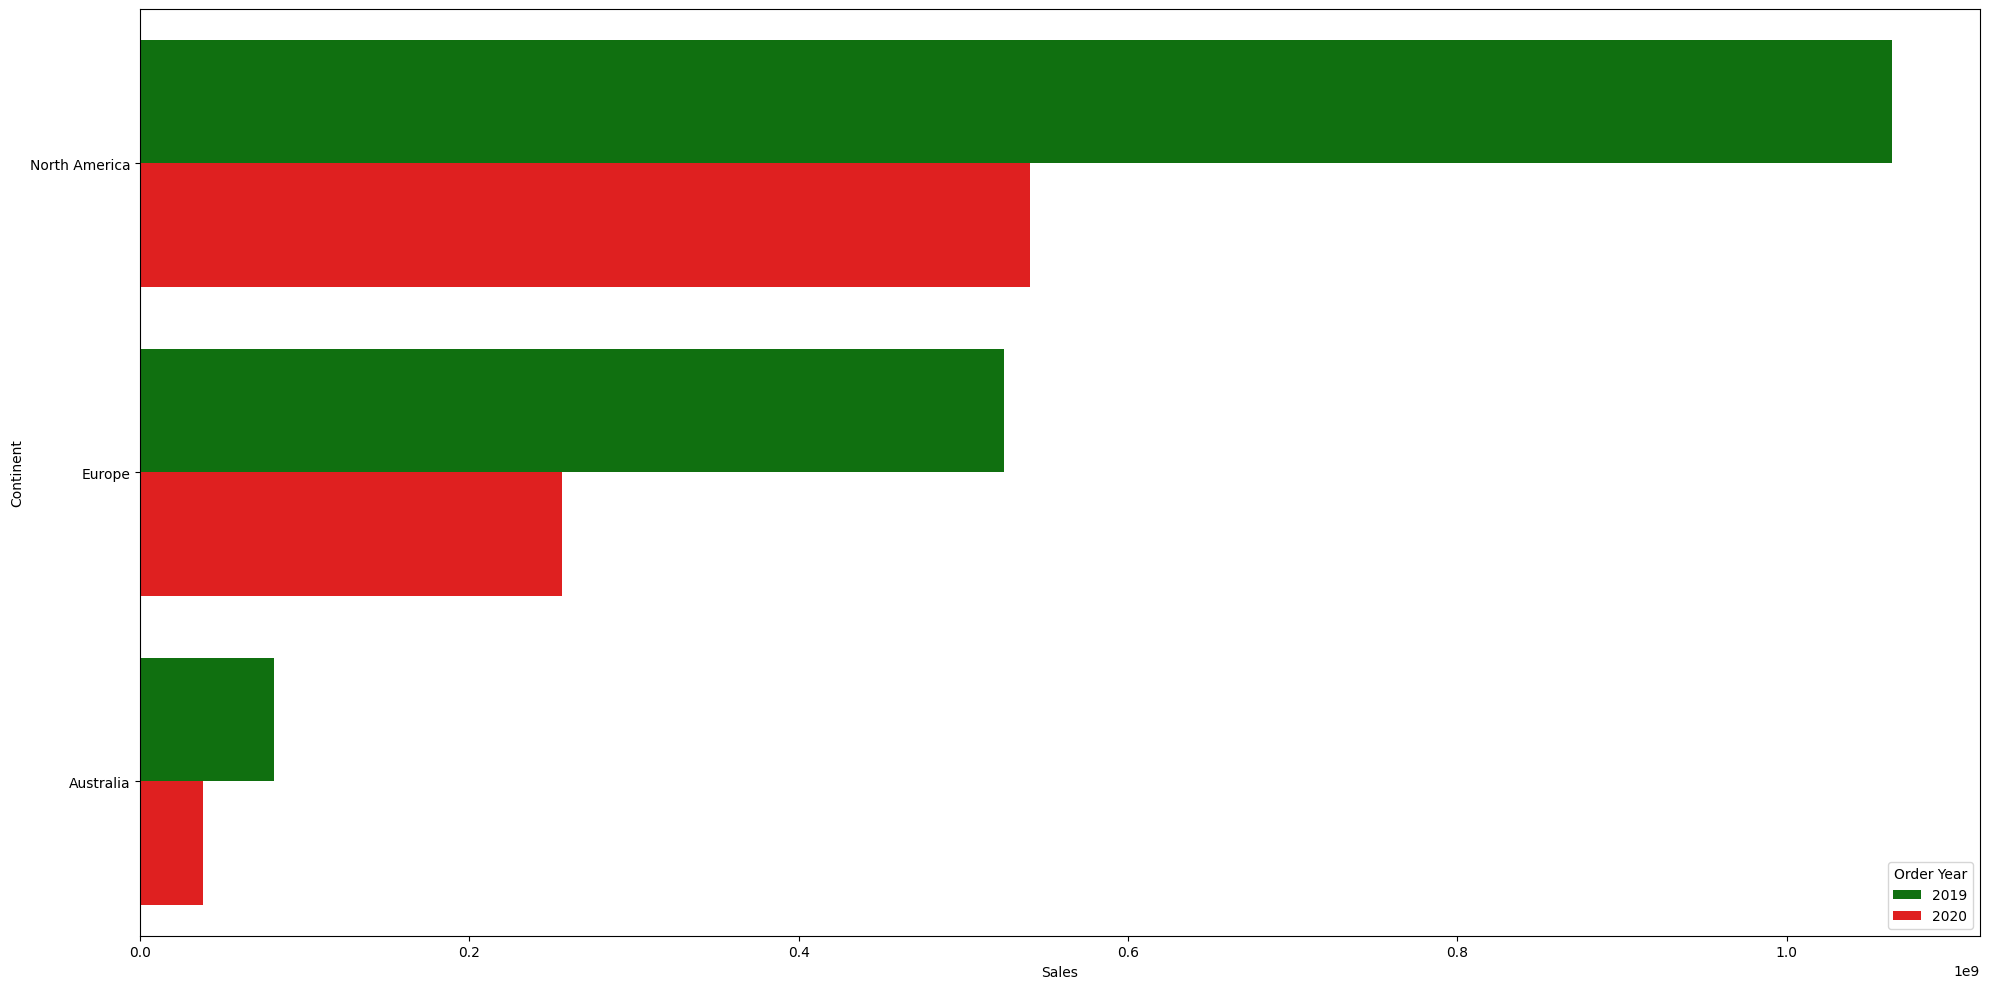

In [62]:
Continent_data = Join_data.groupby(['Order Year','Continent'])[['Sales']].sum().sort_values(ascending=False,by ='Sales').iloc[:50,]

palette= {2019:'green',2020:'red'}
plt.figure(figsize=(20,10))
sns.barplot(data=Continent_data, x='Sales',y='Continent',hue='Order Year',palette = palette)
plt.tight_layout()
plt.show()


In [63]:
Join_data.to_csv('Join_data.csv')

In [64]:
Join_data.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'Product Name', 'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD',
       'SubcategoryKey', 'Subcategory', 'CategoryKey', 'Category', 'Sales',
       'Gender', 'Name', 'City', 'State Code', 'State', 'Zip Code', 'Country',
       'Continent', 'Birthday', 'Age', 'Order Year'],
      dtype='object')

# Customer Segmentation 

# Customer Segmentation Using RFM Analysis (Quantiles Method and K-Means Clustering


1. Data Preparation - Creating Recency DataFrames - Creating Frequency DataFrames - Creating Monetary DataFrames - Creating RFM DataFrames 2. RFM Analysis with Quantiles Method - Calculate RFM Quantiles - Creating Segments using Quantiles - Create RFM Segmentation Table - Calculate RFMScore and Generate Clusters 3. RFM Analysis Using K-Means Clustering - Define K Value for clustering - Fitting Model Predicting CLuster - Cluster Visualization - Cluster Evaluation 4. Cluster Exploration - How many Customer for each group/cluster? - How does each cluster/group contribute to the company's revenue? - What is the common stock ordered in each group - When does each cluster usually made an order? - How does each cluster react on a discounts?



In [65]:
refrence_date = pd.to_datetime('2021-01-01')

In [66]:
rfm = Join_data.groupby('CustomerKey').aggregate({'Order Date':lambda x: refrence_date - x.max(),
                                                 'Order Number':'count','Sales':'sum'})

In [67]:
rfm.rename(columns={'Order Date': 'Recency','Order Number': 'Frequency','Sales':'Monetory'},inplace=True)
rfm['Recency'] = rfm['Recency'].dt.days

In [68]:
rfm.dtypes

Recency        int64
Frequency      int64
Monetory     float64
dtype: object

In [69]:
Scaler = StandardScaler()
rfm_scaled = Scaler.fit_transform(rfm[['Recency','Frequency','Monetory']])

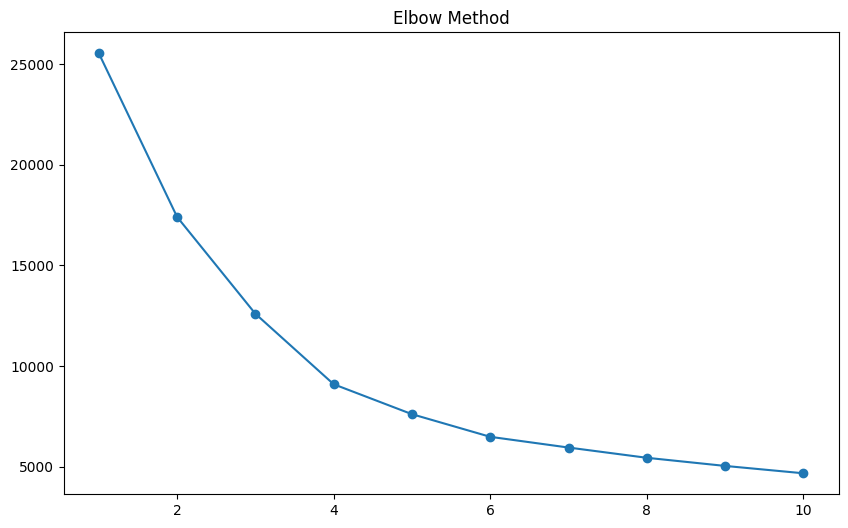

In [70]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
# plt.xlabel("Number of clusters")

plt.title('Elbow Method')
# plt.ylabel('WCSS')
plt.show()


# hence from the above elbow method we can determine a optinum number of cluster to choose for the data

In [71]:
kmeans = KMeans(n_clusters = 4 , random_state = 42)
rfm['Segment'] = kmeans.fit_predict(rfm_scaled)


In [72]:
segment_analysis = rfm.groupby('Segment').mean()
segment_analysis

,Recency,Frequency,Monetory
Segment,,,
0,567.583527,2.532713,1.283568e+05
1,275.911316,2.680392,1.351360e+05
2,359.116618,6.189504,2.579010e+06
3,296.099703,8.058754,4.536849e+05


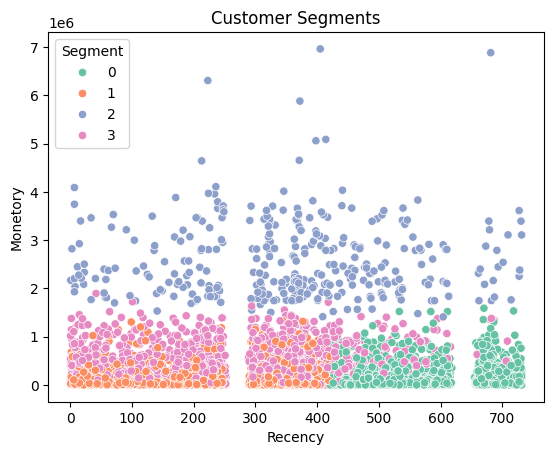

In [73]:
sns.scatterplot(x='Recency', y='Monetory', hue='Segment', data=rfm, palette='Set2')
plt.title('Customer Segments')
plt.show()

# The above diagram show the customer segment as per the KMeans Clustering algorithm

* #  We can also do customer segmentation on the basis of their RFM scores by adding it manually and divide then by group (manually).

In [74]:
refrence_date = pd.to_datetime('2021-01-01')

In [75]:
rfm = Join_data.groupby('CustomerKey').aggregate({'Order Date':lambda x: refrence_date - x.max(),
                                                 'Order Number':'count','Sales':'sum'})

In [76]:
rfm.rename(columns={'Order Date': 'Recency','Order Number': 'Frequency','Sales':'Monetory'},inplace=True)
rfm['Recency'] = rfm['Recency'].dt.days

In [77]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])

In [78]:
quantiles

,Recency,Frequency,Monetory
0.25,300.0,2.0,26268.490000
0.50,377.0,3.0,98787.326150
0.75,510.0,5.0,322656.996625


In [79]:
#CREATING SEGMENTS USING QUANTILES
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [80]:
rfm['R'] = rfm['Recency'].apply(RScore,args=['Recency',quantiles])
rfm['F'] = rfm['Frequency'].apply(FMScore,args=['Frequency',quantiles])
rfm['M'] = rfm['Monetory'].apply(FMScore,args=['Monetory',quantiles])

In [81]:
rfm

,Recency,Frequency,Monetory,R,F,M
CustomerKey,,,,,,
301,417,1,29028.7200,2,1,2
325,363,7,117052.3404,3,4,3
554,393,3,18746.0287,2,2,1
1568,132,5,198292.9802,4,3,3
1585,673,3,173411.1079,1,2,3
...,...,...,...,...,...,...
2099252,90,3,55746.8500,4,2,2
2099383,216,3,95129.1300,4,2,2
2099758,205,4,6299.6450,4,3,1


In [82]:
rfm['RFM'] = rfm['R'] + rfm['F'] + rfm['M']
rfm['RFM']

CustomerKey
301         5
325        10
554         5
1568       10
1585        6
           ..
2099252     8
2099383     8
2099758     8
2099862     7
2099937     7
Name: RFM, Length: 8512, dtype: int64

In [83]:
def rfm_segments(Score):
    if Score < 5:
        return 'Low_value'
    elif Score < 9 :
        return 'Medium_value'
    else:
        return 'High_value'

In [84]:
rfm['Segments'] = rfm['RFM'].apply(rfm_segments)

In [85]:
rfm_seg_counts = rfm['Segments'].value_counts().reset_index()

In [86]:
rfm_seg_counts

,Segments,count
0,Medium_value,4184
1,High_value,2922
2,Low_value,1406


In [87]:
rfm_seg_counts.columns = ['Segments','Counts']
rfm_seg_counts

,Segments,Counts
0,Medium_value,4184
1,High_value,2922
2,Low_value,1406


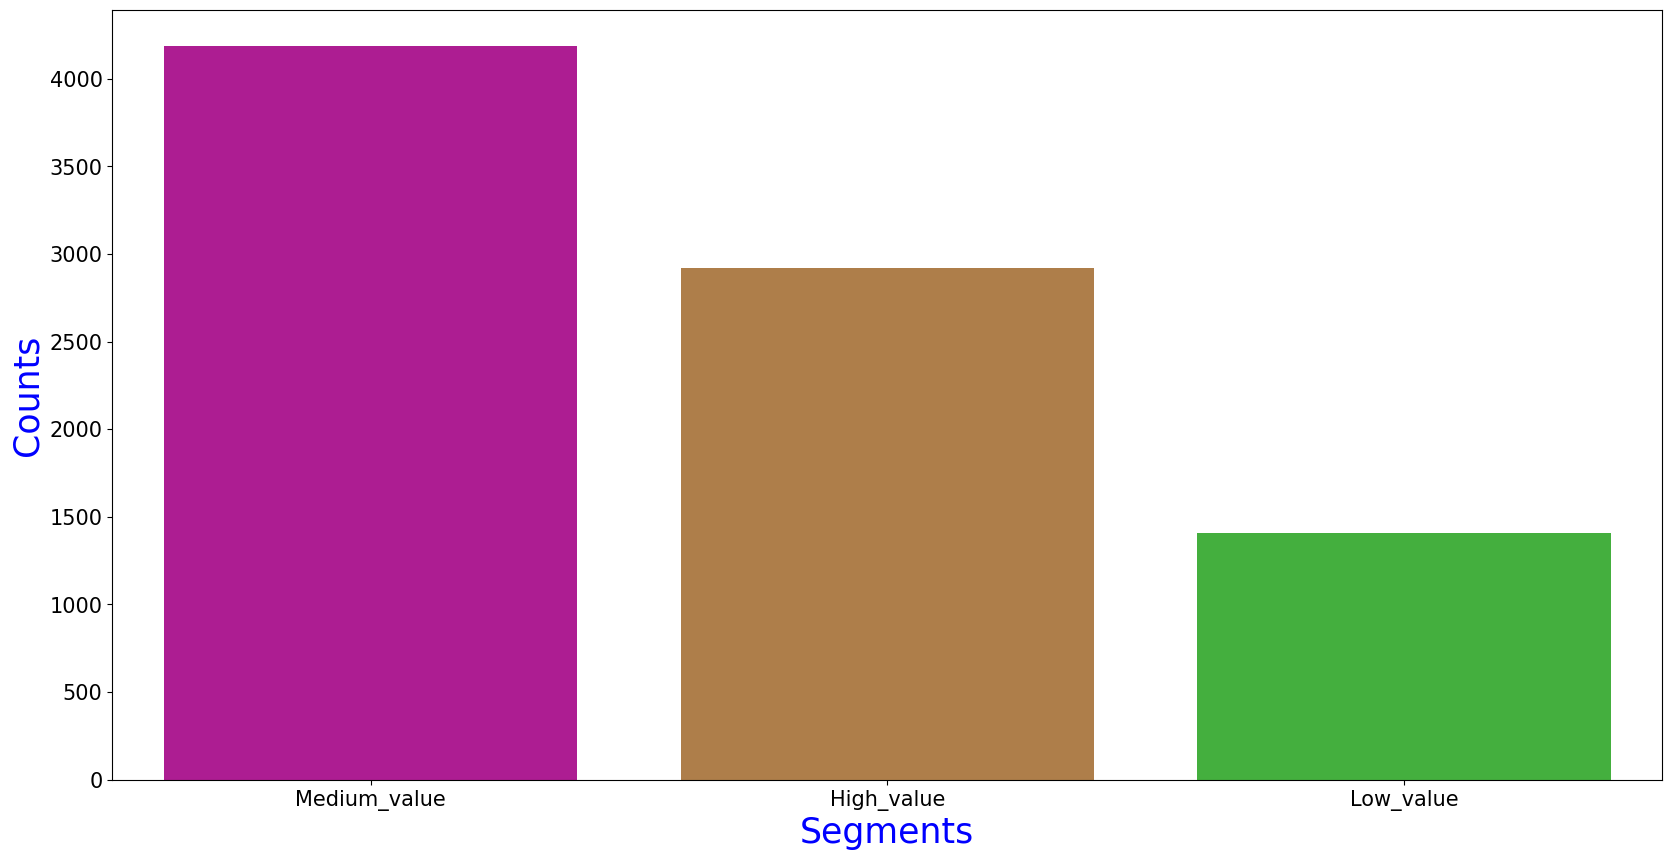

In [88]:
np.random.seed(10)
plt.figure(figsize=(20,10))
random_palette = np.random.rand(len(rfm_seg_counts),3)
ax = sns.barplot(data= rfm_seg_counts,x='Segments',y = 'Counts',palette = random_palette)
ax.set_xlabel('Segments',fontsize=25,color = 'blue')
ax.set_ylabel('Counts',fontsize=25,color = 'blue')
plt.xticks(fontsize=15)  # X-axis label with larger font size
plt.yticks(fontsize=15)    # Y-axis label with larger font size
plt.show()

In [89]:
rfm

,Recency,Frequency,Monetory,R,F,M,RFM,Segments
CustomerKey,,,,,,,,
301,417,1,29028.7200,2,1,2,5,Medium_value
325,363,7,117052.3404,3,4,3,10,High_value
554,393,3,18746.0287,2,2,1,5,Medium_value
1568,132,5,198292.9802,4,3,3,10,High_value
1585,673,3,173411.1079,1,2,3,6,Medium_value
...,...,...,...,...,...,...,...,...
2099252,90,3,55746.8500,4,2,2,8,Medium_value
2099383,216,3,95129.1300,4,2,2,8,Medium_value
2099758,205,4,6299.6450,4,3,1,8,Medium_value


In [90]:


rfm['RFM_customer_segment'] = ''
rfm

,Recency,Frequency,Monetory,R,F,M,RFM,Segments,RFM_customer_segment
CustomerKey,,,,,,,,,
301,417,1,29028.7200,2,1,2,5,Medium_value,
325,363,7,117052.3404,3,4,3,10,High_value,
554,393,3,18746.0287,2,2,1,5,Medium_value,
1568,132,5,198292.9802,4,3,3,10,High_value,
1585,673,3,173411.1079,1,2,3,6,Medium_value,
...,...,...,...,...,...,...,...,...,...
2099252,90,3,55746.8500,4,2,2,8,Medium_value,
2099383,216,3,95129.1300,4,2,2,8,Medium_value,
2099758,205,4,6299.6450,4,3,1,8,Medium_value,


In [91]:
rfm.dtypes

Recency                   int64
Frequency                 int64
Monetory                float64
R                         int64
F                         int64
M                         int64
RFM                       int64
Segments                 object
RFM_customer_segment     object
dtype: object

In [92]:
rfm.loc[rfm['RFM'] >= 9,'RFM_customer_segment'] = 'VIP / Loyal'
rfm.loc[(rfm['RFM'] >= 6) & (rfm['RFM'] < 9),'RFM_customer_segment'] = 'Potential_loyal'
rfm.loc[(rfm['RFM'] >= 5) & (rfm['RFM'] < 6), 'RFM_customer_segment'] = 'At_Risk_Customer'
rfm.loc[(rfm['RFM'] >= 4) & (rfm['RFM'] < 5),'RFM_customer_segment'] = 'Cant_loose'
rfm.loc[(rfm['RFM'] >= 3) & (rfm['RFM'] < 4),'RFM_customer_segment'] = 'Lost'
rfm

,Recency,Frequency,Monetory,R,F,M,RFM,Segments,RFM_customer_segment
CustomerKey,,,,,,,,,
301,417,1,29028.7200,2,1,2,5,Medium_value,At_Risk_Customer
325,363,7,117052.3404,3,4,3,10,High_value,VIP / Loyal
554,393,3,18746.0287,2,2,1,5,Medium_value,At_Risk_Customer
1568,132,5,198292.9802,4,3,3,10,High_value,VIP / Loyal
1585,673,3,173411.1079,1,2,3,6,Medium_value,Potential_loyal
...,...,...,...,...,...,...,...,...,...
2099252,90,3,55746.8500,4,2,2,8,Medium_value,Potential_loyal
2099383,216,3,95129.1300,4,2,2,8,Medium_value,Potential_loyal
2099758,205,4,6299.6450,4,3,1,8,Medium_value,Potential_loyal


In [93]:
seg_data = rfm.groupby(['Segments','RFM_customer_segment'])
seg_data = pd.DataFrame(seg_data['RFM_customer_segment'].value_counts())
seg_data.sort_values(ascending=True,by ='count',inplace = True)
seg_data

count
Segments     RFM_customer_segment       
Low_value    Lost                    600
             Cant_loose              806
Medium_value At_Risk_Customer       1041
High_value   VIP / Loyal            2922
Medium_value Potential_loyal        3143

<Figure size 2000x1000 with 0 Axes>

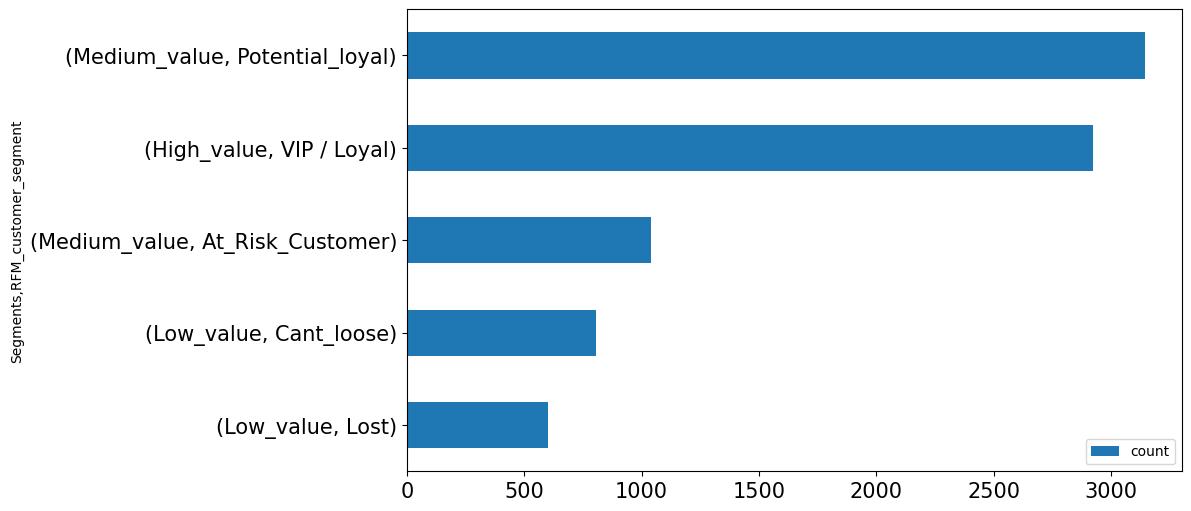

In [94]:
np.random.seed(10)
plt.figure(figsize= (20,10))
random_palette = np.random.rand(len(seg_data-1),3)
seg_data.plot(kind = 'barh',stacked=True,figsize = (10,6))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

# Hypothesis Testing 

# Hypothesis: Repeat customers have declined
# H0: No significant difference in customer frequency between 2019 and 2020
# H1: Significant decline in customer frequency in 2020

### Explanation:
* ### common_customers: This variable contains the list of customer IDs that are present in both 2019 and 2020.
* ### Filtering and Aligning: We filter the sales data to include only these common customers and then ensure that the freq_2019 and freq_2020 arrays are aligned by customer ID.
* ### Performing the Test: With the arrays now of equal length and aligned, the paired t-test can be performed without error.
* ### This approach should resolve the ValueError and allow you to proceed with the hypothesis testing.

In [121]:
customer_2019 = Join_data[Join_data['Order Year'] == 2019]['CustomerKey'].unique()
customer_2019.shape

(6497,)

In [122]:
customer_2020 = Join_data[Join_data['Order Year'] == 2020]['CustomerKey'].unique()
customer_2020.shape

(3868,)

In [123]:
common_customers = np.intersect1d(customer_2019,customer_2020)
common_customers.shape

(1853,)

In [124]:
freq_2019 = Join_data[(Join_data['CustomerKey'].isin(common_customers)) & (Join_data['Order Year']==2019)].groupby('CustomerKey').count()['Order Number']
freq_2020 = Join_data[(Join_data['CustomerKey'].isin(common_customers)) & (Join_data['Order Year']==2020)].groupby('CustomerKey').count()['Order Number']

In [125]:
Join_data.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'Product Name', 'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD',
       'SubcategoryKey', 'Subcategory', 'CategoryKey', 'Category', 'Sales',
       'Gender', 'Name', 'City', 'State Code', 'State', 'Zip Code', 'Country',
       'Continent', 'Birthday', 'Age', 'Order Year'],
      dtype='object')

In [128]:
ttest_stats , p_value  = stats.ttest_rel(freq_2019,freq_2020)

In [131]:
if p_value < 0.05:
    print('Reject the null hypothesis : There is significant decline in the frequency of customers in 2020')
else:
    print('Fail to reject the null hypothesis : There is no significant decline in the frequency of customers in 2020')

Reject the null hypothesis : There is significant decline in the frequency of customers in 2020


# H0 is rejected 

# There is significant decline in the frequency of the no. of orders in 2020 as compared to 2019

* #  Hence there is a significant decline because of the decline in the frequency of customers 

# Overall findings

# Findings from the Analysis
### Overall Sales Decline:

### * Total sales revenue dropped nearly 50% from 2019 to 2020.
### * Sales in 2019 were 1.66 billion USD, which declined to 834 million USD in 2020​

# Order Volume:

### The number of orders decreased significantly:
### 21,611 orders in 2019 versus 11,026 in 2020.
### This represents a 50% drop in order quantity​

# Customer Frequency:

### Analysis indicates a substantial decline in repeat customers in 2020 compared to 2019.
### Hypothesis testing revealed a statistically significant decline in customer frequency for repeat purchases​


# Customer Segmentation:

## RFM Analysis (Recency, Frequency, Monetary):
### Many customers were categorized as "at risk" or "lost customers."
### High-value and loyal customers represented a smaller percentage in 2020 compared to 2019​

# Demographics and Behavior:

### Age and gender distributions showed no significant anomalies, but lower purchasing trends were noted across all demographics.
### There was no evident recovery in engagement among younger or older age groups​

# Product Performance:

### Certain product categories and subcategories underperformed.
### Substantial drops in sales volume were observed for high-ticket items​

# Regional Performance:

### Declines were observed across multiple regions, with the most significant impacts in countries like the United States, Canada, and Germany.
### Global disruptions, possibly due to external factors like the pandemic, may have contributed to this​

# Operational Issues:

## Delivery challenges were identified:
### A significant number of orders lacked proper delivery dates (imputed to store pickups).
### This could reflect operational inefficiencies impacting customer satisfaction​

# Potential Minor Causes
## Macroeconomic Trends:
### The pandemic or other economic downturns likely contributed to reduced consumer spending.
## Product Relevance:
### Declines in demand for certain product categories could indicate shifting consumer preferences.
## Customer Retention Strategies:
### Inadequate focus on retaining high-value customers and incentivizing repeat purchases.
